# Plotting Final Results

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np



In [21]:
RESULTS_PATH = 'data/results/'
file_names = ['f_PPO_counting_1_deck_linear_lr_results.json',]
odds = 20.0
baseline_file_name = 'baselines_performance.json'


In [23]:
results_dict = {}

for file_name in file_names:
    with open(RESULTS_PATH + file_name) as f:
        model_name = file_name.replace('_results.json', '')
        results_dict[file_name] = json.load(f)

with open(RESULTS_PATH + baseline_file_name) as f:
    results_dict["baseline"] = json.load(f)


#get average and min/max for each model
for model_name, results in results_dict.items():
    if model_name == "baseline":
        continue
    edges = []
    for key, value in results.items():
        edges.append(value['avg_edge'])
    results_dict[model_name]['avg_edge'] = np.mean(edges)
    results_dict[model_name]['min_edge'] = np.min(edges)
    results_dict[model_name]['max_edge'] = np.max(edges)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'f_PPO_counting_1_deck_linear_lr_results.json'),
  Text(1, 0, 'baseline_no_count'),
  Text(2, 0, 'baseline_count_1_decks'),
  Text(3, 0, 'baseline_count_2_decks'),
  Text(4, 0, 'baseline_count_4_decks')])

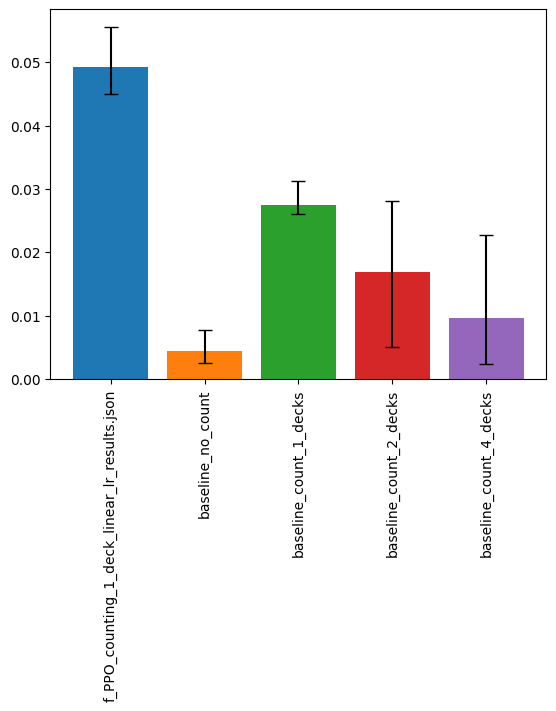

In [31]:
#bar plot comparing baseline to models

fig, ax = plt.subplots()
model_names = list(results_dict.keys())
model_names.remove('baseline')
for model_name in model_names:
    ax.bar(model_name, results_dict[model_name]['avg_edge'], yerr=[[results_dict[model_name]['avg_edge'] - results_dict[model_name]['min_edge']], [results_dict[model_name]['max_edge'] - results_dict[model_name]['avg_edge']]], capsize=5)
#plot baseline
ax.bar('baseline_no_count', np.mean(results_dict['baseline']['(1, 1)']), yerr=[[np.mean(results_dict['baseline']['(1, 1)']) - min(results_dict['baseline']['(1, 1)'])], [max(results_dict['baseline']['(1, 1)']) - np.mean(results_dict['baseline']['(1, 1)'])]], capsize=5)
for deck in [1,2,4]:
    ax.bar(f'baseline_count_{deck}_decks', np.mean(results_dict['baseline'][f'(20, {deck})']), yerr=[[np.mean(results_dict['baseline'][f'(20, {deck})']) - min(results_dict['baseline'][f'(20, {deck})'])], [max(results_dict['baseline'][f'(20, {deck})']) - np.mean(results_dict['baseline'][f'(20, {deck})'])]], capsize=5)

#rotate x labels
plt.xticks(rotation=90)